# **🔹 Step 1: Problem Overview**

## Dataset Description:
- Pregnancies: Number of times pregnant
- Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance  test
- BloodPressure: Diastolic blood pressure (mm Hg)
- SkinThickness: Triceps skin fold thickness (mm)
- Insulin: 2-Hour serum insulin (mu U/ml)
- BMI: Body mass index (weight in kg/(height in m)^2)
- DiabetesPedigreeFunction: Diabetes pedigree function
- Age: Age (years)
- Outcome: Class variable (0 or 1)


### Import Dependences

In [1]:

import numpy as np
import pandas as pd
# For removing warnings
import warnings
warnings.simplefilter("ignore")
# For visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('crest_r')
# For spliting data into train and test
from sklearn.model_selection import train_test_split
# For Feature Engineering
from sklearn.base import BaseEstimator, TransformerMixin
# For making Pipelines
from sklearn.pipeline import Pipeline
# For preprocessing
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.combine import SMOTETomek
from sklearn.preprocessing import RobustScaler,StandardScaler,MinMaxScaler,MaxAbsScaler
from sklearn.preprocessing import PowerTransformer, QuantileTransformer,SplineTransformer,FunctionTransformer
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
from sklearn.impute import SimpleImputer ,KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

# For Modeling and Traning
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# For metrics
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score, f1_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix

# For FineTuning
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
# For Deployment
import pickle as pkl

# **🔹 Step 2: Get the data**

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Machine Learning projects 2025 /Diabetes Classification/diabetes.csv")

# **🔹 Step 3: Exploratory Data Analysis**


## ⏬  **Statistical Analysis**

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.isna().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [7]:

df.duplicated().sum()

np.int64(0)

In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Feature-wise Statistical Summary**

- 🔹 `Outcome (Target Variable)` :
    * Binary: 0 (non-diabetic), 1 (diabetic)
    * Mean: 0.349 → ~34.9% of participants are diabetic
    * Distribution: Slightly imbalanced (more non-diabetic cases).

- 🔹 `Pregnancies` :
    * Range: 0 - 17
    * Mean: 3.85 | Std: 3.37
    * Median (50%): 3
    - Most women had 1-6 pregnancies, though a maximum of 17 is recorded (an extreme case).

- 🔹 `Glucose` :
    * Range: 0 - 299
    * Mean: 120  | Std: 31.9
    * Median (50%) : 117
    - Note: A minimum `glucose` of 0 is unrealistic, indicating missing values coded as zero.

- 🔹 `BloodPressure` :
    * Range: 0 - 122
    * Mean: 69  | Std: 19
    * Median (50%) : 72
    - Note: A minimum `BloodPressure` of 0 is unrealistic, indicating missing values coded as zero.


- 🔹 `SkinThickness	` :
    * Range: 0 - 99
    * Mean: 20  |Std: 15.9
    * Median (50%) : 23
    - Large portion of the dataset has 0 values, indicating missing measurements (as 25% value is 0).


- 🔹 `	Insulin` :
    * Range: 0 - 846
    * Mean: 79   | Std: 115
    * Median (50%) : 30.5
    - Note: A minimum `glucose` of 0 is unrealistic, indicating missing values coded as zero.


- 🔹 `BMI	` :
    * Range: 0 - 67
    * Mean: 31.9   |Std: 7.8
    * Median (50%) : 32
    - Note: A minimum `BMI` of 0 is unrealistic, indicating missing values coded as zero , but the mean and median are close so it is normal distribution.

- 🔹 `DiabetesPedigreeFunction` :
    * Range: 0.7 - 2.4
    * Mean: .47  |Std: .32
    * Median (50%) : .37
    - A measure of genetic risk; distribution shows most values below 1.


- 🔹 `Age` :
    * Range: 21 - 81
    * Mean: 33  |Std: 11.7
    * Median (50%) : 29
    - Most participants are young to middle-aged adults , as 75% are 41 years old.



## ⏬  **Visualization**

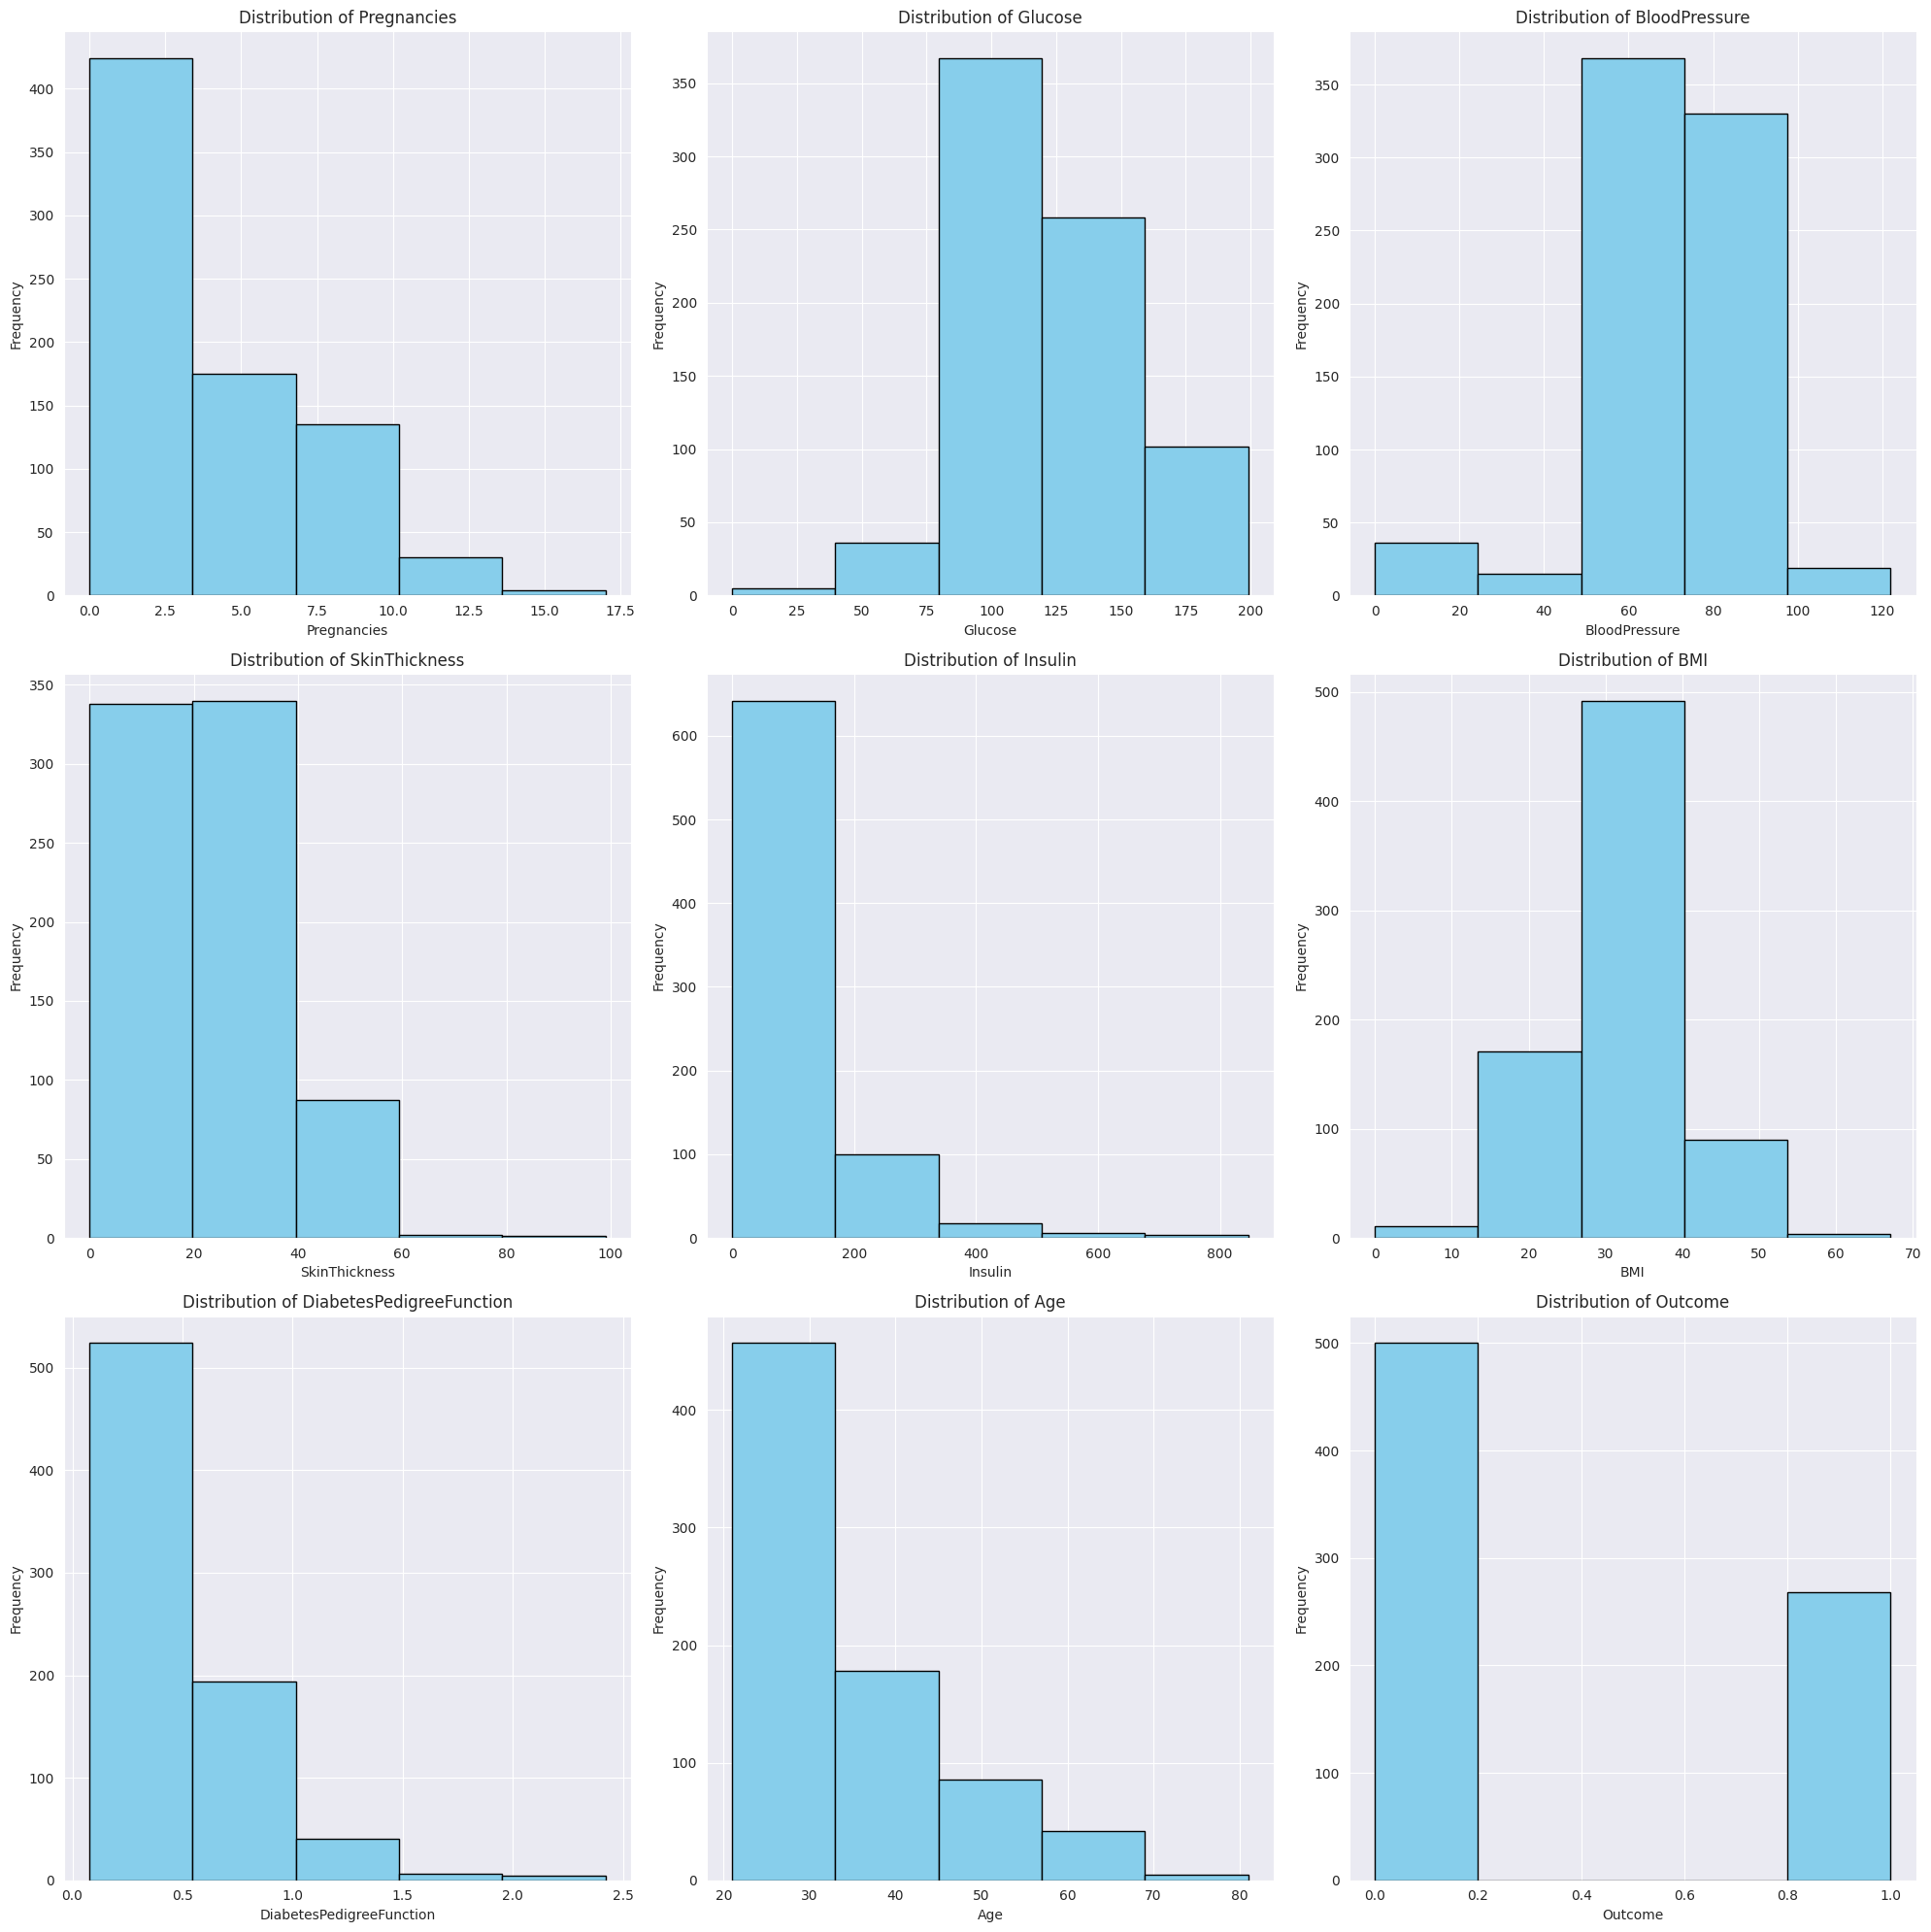

In [9]:

# Set up subplots
num_plots = len(df.columns)
cols_per_row = 3
rows = int(np.ceil(num_plots / cols_per_row))

fig, axes = plt.subplots(rows, cols_per_row, figsize=(20, 20))
axes = axes.flatten()  # Flatten in case of multiple rows

# Plot each histogram
for i, col in enumerate(df.columns):
    axes[i].hist(df[col], bins=5, edgecolor='black', color='skyblue')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


1. Many features are skewed and may need transformation

    - `Insulin` is extremely right-skewed, with a huge cluster near zero → consider **log transform** or **treating zeros as missing**.

    - `SkinThickness` and `BloodPressure` also show unnatural zeros → likely missing values encoded as 0.

2. `Glucose` and `BMI` show clearer separation

    - `Glucose` peaks around 100–130.

    - `BMI` shows a fairly normal distribution but skewed right.

3. `Outcome` is **imbalanced**

    - “0” (non-diabetic) is much more frequent.

    - → Consider **SMOTE**, **class weights**, or **rebalancing**.

4. `Pregnancies` and `Age` are skewed

    - Many women have low pregnancy counts.

    - `Age` distribution is concentrated around 20–45.

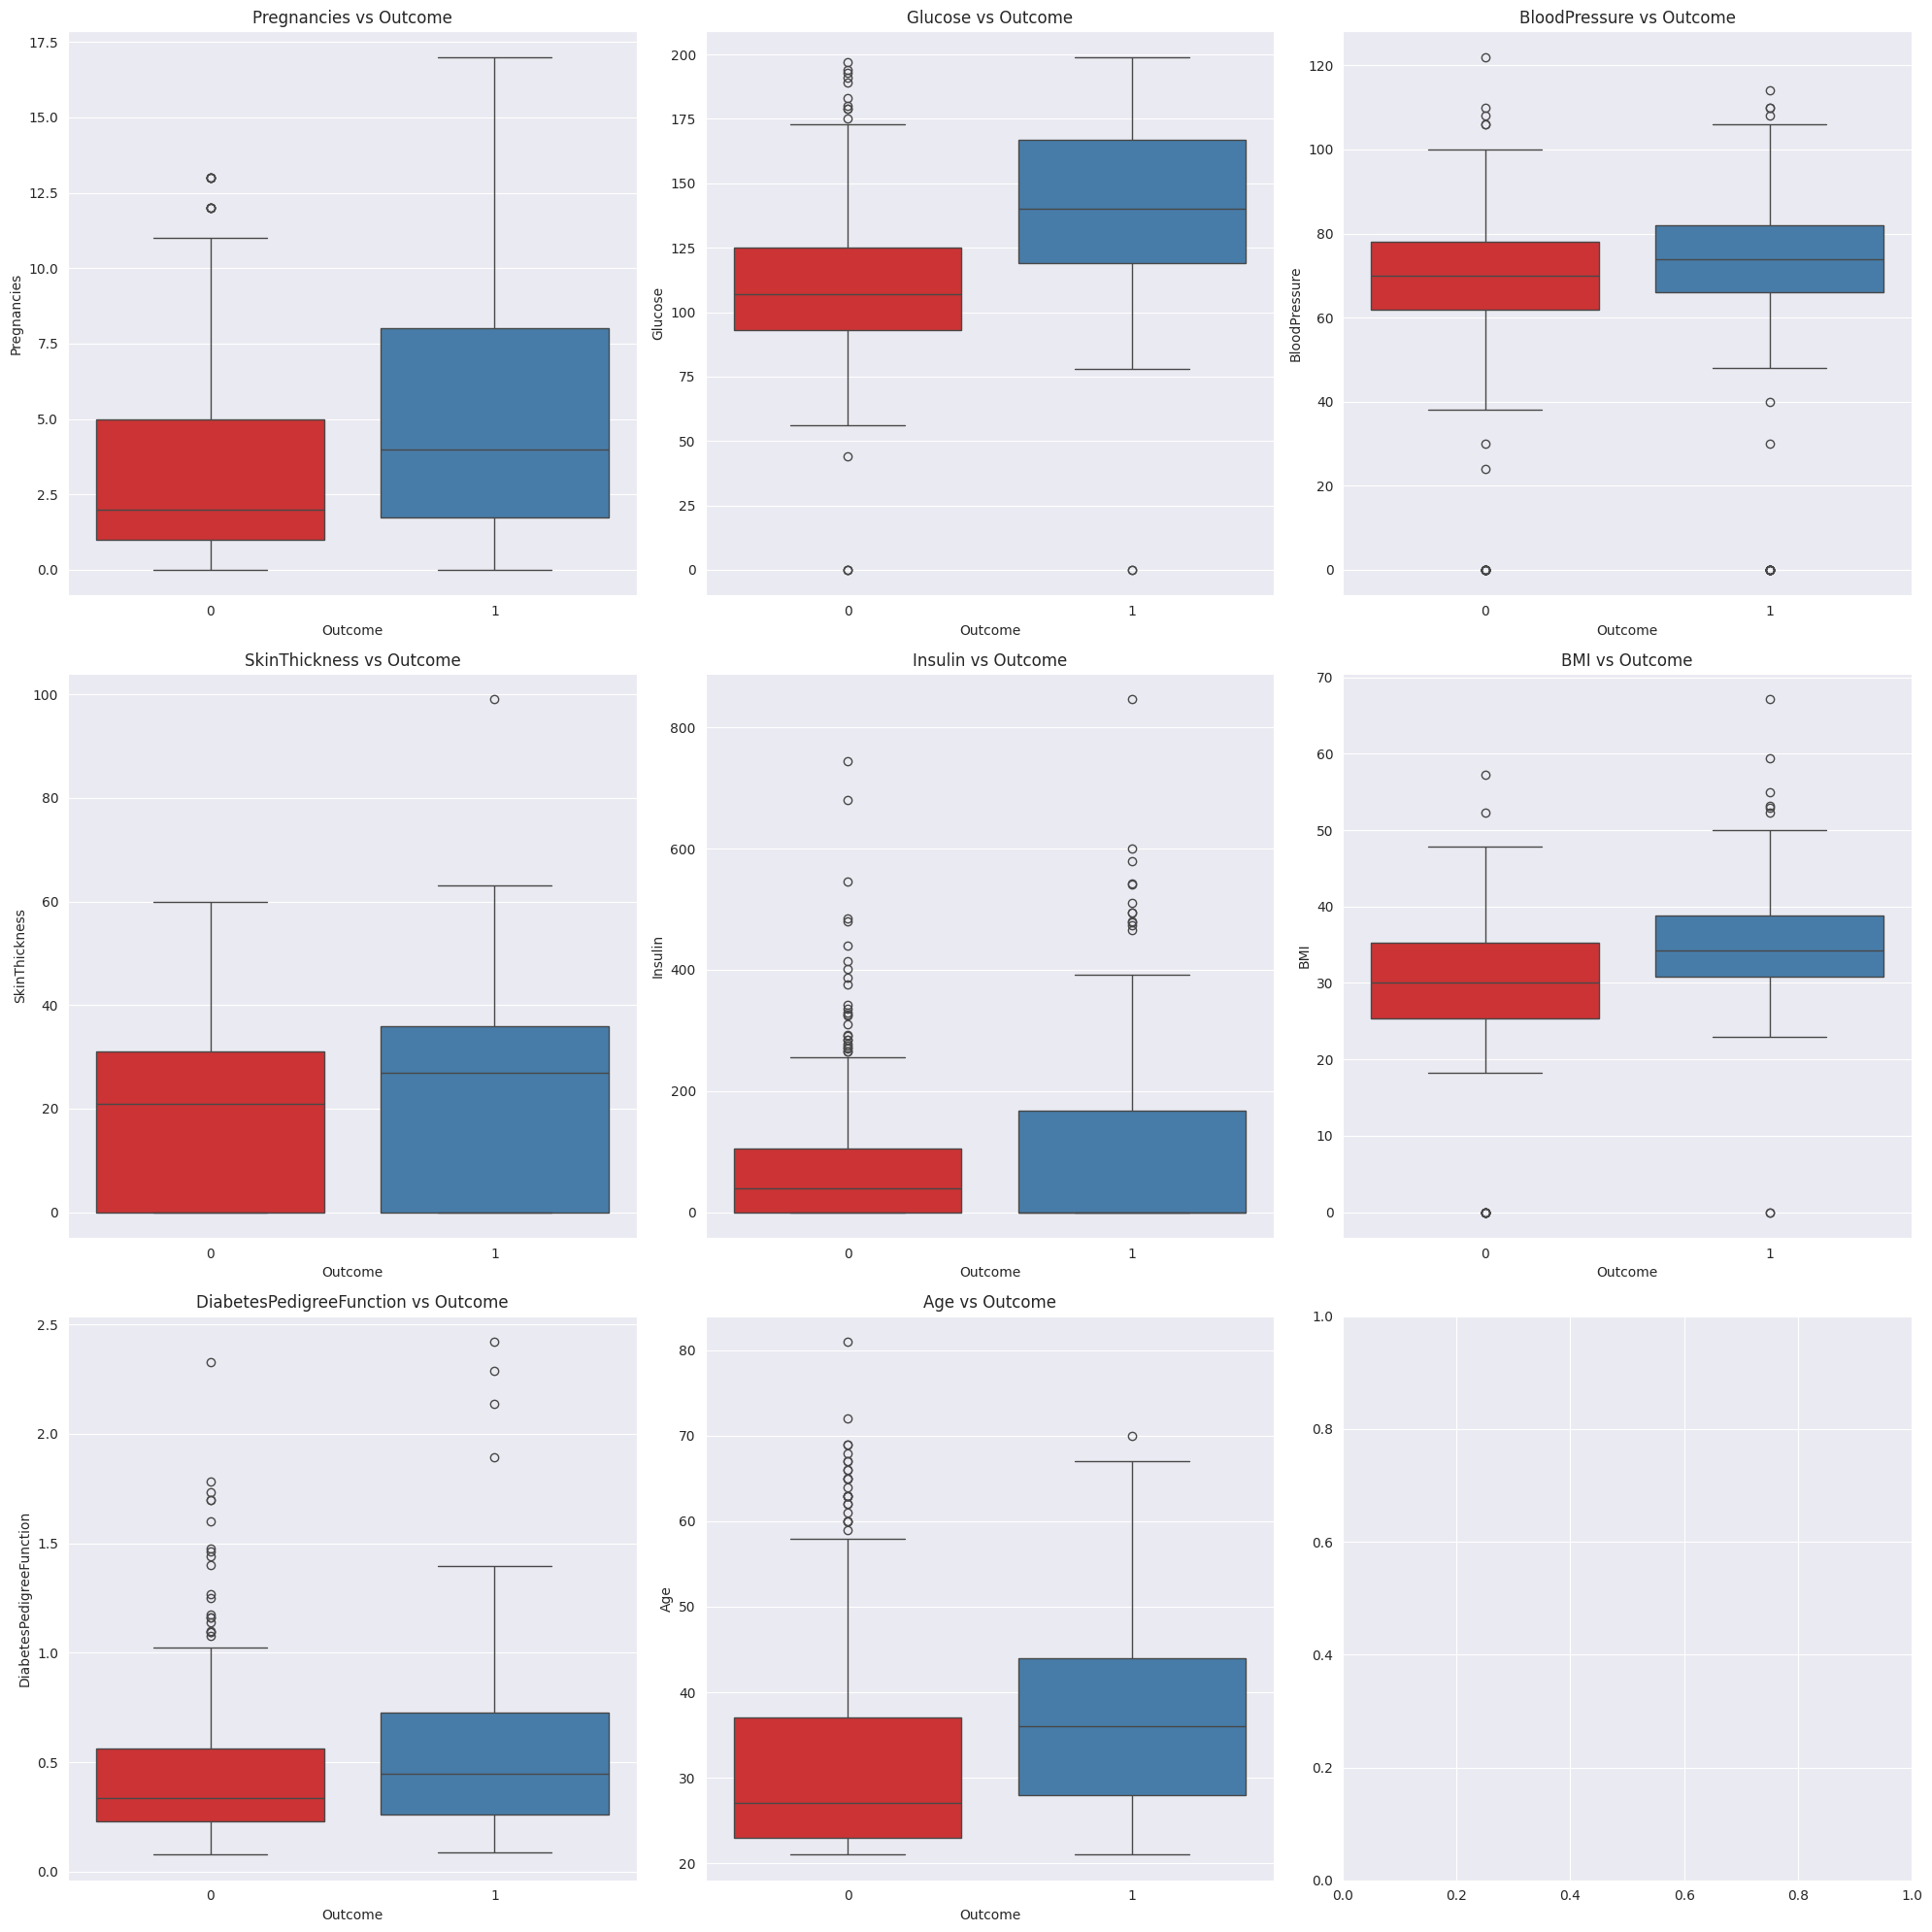

In [10]:
# Set up subplots
num_plots = len(df.columns)-1
cols_per_row = 3
rows = int(np.ceil(num_plots / cols_per_row))

fig, axes = plt.subplots(rows, cols_per_row, figsize=(20, 20))
axes = axes.flatten()  # Flatten in case of multiple rows

# Plot each histogram
for i, col in enumerate(df.columns):
  if col == "Outcome":
        continue
  sns.boxplot(x="Outcome", y=col, data=df, ax=axes[i], palette="Set1")
  axes[i].set_title(f"{col} vs Outcome")


# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

1. `Glucose` — the strongest separator
    - People with Outcome = 1 have much higher glucose levels.
    - Median glucose for diabetic group is clearly higher.
    - Almost no overlap in the upper quartile.
 - 👉 This is the top predictor of diabetes.

2. `BMI` — also significantly higher in diabetics
    - Diabetic individuals have noticeably higher BMI.
    - The entire distribution is shifted upward.
  - 👉 Obesity increases diabetes risk — clearly reflected here.

3. `Age` — diabetics are older
    - Diabetic group median age > A non-diabetic median age.
    - A lot more individuals >40 in the diabetic category.
  - 👉 Age is a strong risk factor.

4. `Pregnancies` — higher in diabetics
    - Higher median for diabetic group.
    - Long right tail for diabetics.
  - 👉 Relevant especially for gestational diabetes history.

5. `DiabetesPedigreeFunction` — slightly higher in diabetics
   - The difference is smaller than glucose/BMI/age.
   - But diabetics still show a higher median.
  - 👉 Family history contributes, but weaker predictor.

6. `BloodPressure` — small difference
    - Very slight increase in diabetics.
    - High overlap between groups.
  - 👉 Weak predictor by itself.

7. `SkinThickness` — slightly higher in diabetics
    - But the difference is small and there are many zero values → likely missing values.
  - 👉 Interpretation is unreliable without imputation.

8. `Insulin` — looks higher in diabetics but extremely skewed
Very high outliers.
    - Most values are very low (often zero = missing).
  - 👉 Insulin requires cleaning before drawing conclusions.

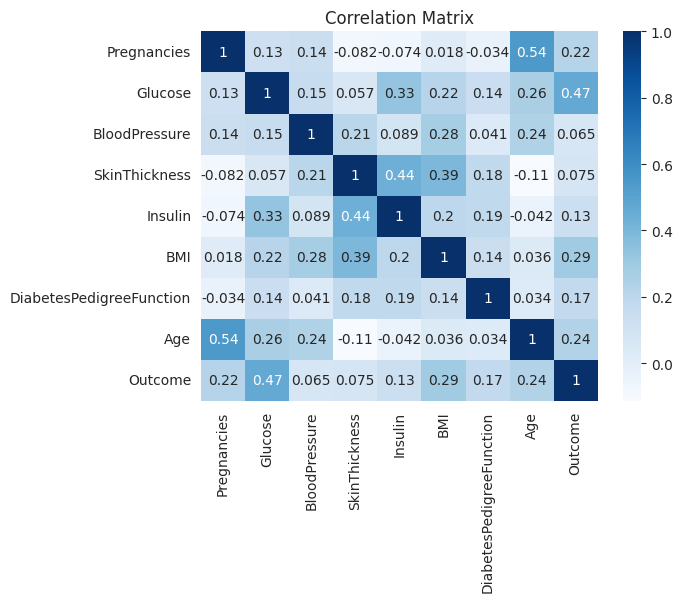

In [11]:
sns.heatmap(df.corr() , cmap='Blues' , annot=True)
plt.title('Correlation Matrix')
plt.show()

# **🔹 Step 4: Data Preparation**


In [12]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

In [13]:
# 3. Handle class imbalance
smote = SMOTE(sampling_strategy='minority')
X_res, y_res = smote.fit_resample(X, y)
print("After SMOTE:\n", y_res.value_counts())


After SMOTE:
 Outcome
1    500
0    500
Name: count, dtype: int64


In [14]:
# 1. Clean the missing values
print(df[df["BMI"]== 0].shape)
print(df[df["SkinThickness"]== 0].shape)
print(df[df["Glucose"]== 0].shape)
print(df[df["BloodPressure"]== 0].shape)
print(df[df["Insulin"]== 0].shape)

(11, 9)
(227, 9)
(5, 9)
(35, 9)
(374, 9)


In [15]:
df['BMI'].replace(0,np.nan ,inplace =True)
df["SkinThickness"].replace(0,np.nan ,inplace =True)
df["Glucose"].replace(0,np.nan ,inplace =True)
df["BloodPressure"].replace(0,np.nan ,inplace =True)
df["Insulin"].replace(0,np.nan ,inplace =True)

In [16]:
# 2. Try scaling

pipeline_1=Pipeline([("imputer" , SimpleImputer(strategy="median")),
                     ("scaling", StandardScaler()),
                         ("power", PowerTransformer())])
# pipeline_2 = Pipeline([("imputer", SimpleImputer(strategy="median")),
#                            ("scaling", RobustScaler()),
#                            ("power", PowerTransformer())])
pipeline_2 = Pipeline([("imputer", KNNImputer(n_neighbors=6)),
                           ("scaling", MinMaxScaler()),
                           ("power", PowerTransformer())])

In [17]:
x_train,x_test,y_train,y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

# **🔹 Step 5: Choose and train a model**

In [18]:
# from sklearn.metrics import (
#     accuracy_score, f1_score, precision_score, recall_score,
#     roc_auc_score, confusion_matrix, classification_report
# )
from tabulate import tabulate  # for clean printing

# -------------------------------------------------------
# MODELS
# -------------------------------------------------------
dict_models = {
    'Logistic Regression': LogisticRegression(),
    'K-NN': KNeighborsClassifier(n_neighbors=3),
    'Decision Tree': DecisionTreeClassifier(random_state=10),
    'Random Forest': RandomForestClassifier(n_estimators=60, random_state=0),
    'SVM': SVC(kernel="linear", probability=True),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=10),
    'Naive Bayes': GaussianNB()
}

# -------------------------------------------------------
# PIPELINES (PREPROCESSING)
# -------------------------------------------------------
pipelines = [
    ("Pipeline 1", pipeline_1),
    ("Pipeline 2", pipeline_2),
    # ("Pipeline 3", pipeline_3)
]

# -------------------------------------------------------
# STORAGE FOR FINAL RESULTS
# -------------------------------------------------------
results = []

print("\n====================== MODEL COMPARISON STARTED ======================\n")

for pipeline_name, pipeline in pipelines:
    # print(f"\n🔧 USING: {pipeline_name}")
    # print("-" * 70)

    for name, model in dict_models.items():

        model_pipeline = Pipeline([
            ("preprocess", pipeline),
            ("model", model)
        ])

        model_pipeline.fit(x_train, y_train)

        y_train_pred = model_pipeline.predict(x_train)
        y_test_pred = model_pipeline.predict(x_test)

        # acc = accuracy_score(y_test, y_test_pred)
        train_acc = accuracy_score(y_train,  y_train_pred)
        test_acc  = accuracy_score(y_test, y_test_pred)
        f1 = f1_score(y_test, y_test_pred)
        precision = precision_score(y_test, y_test_pred)
        recall = recall_score(y_test, y_test_pred)
        roc_auc = roc_auc_score(y_test, model_pipeline.predict_proba(x_test)[:,1])

        # print(f"✔ {name:<20} | Accuracy: {acc*100:5.2f}% | F1: {f1:.3f} | Recall: {recall:.3f}")

        results.append({
            "Pipeline": pipeline_name,
            "Model": name,
            "Train Accuracy": train_acc,
            "Test Accuracy" :test_acc,
            "Precision": precision,
            "Recall": recall,
            "F1 Score": f1,
            "ROC-AUC": roc_auc
        })

print("\n====================== MODEL COMPARISON FINISHED ======================\n")

# -------------------------------------------------------
# CLEAN, SORTED RESULTS TABLE
# -------------------------------------------------------
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by=["Test Accuracy", "F1 Score"], ascending=False)

# print("\n📊 FINAL SORTED RESULTS (BEST MODELS ON TOP)\n")
# print(tabulate(results_df, headers="keys", tablefmt="grid", showindex=False))

# -------------------------------------------------------
# OPTIONAL: DISPLAY IN JUPYTER NICELY
# -------------------------------------------------------
results_df.head(10)



====================== MODEL COMPARISON STARTED ======================


====================== MODEL COMPARISON FINISHED ======================



,Pipeline,Model,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,ROC-AUC
3,Pipeline 1,Random Forest,1.000000,0.816667,0.800000,0.847682,0.823151,0.872705
10,Pipeline 2,Random Forest,1.000000,0.813333,0.795031,0.847682,0.820513,0.873572
5,Pipeline 1,XGBoost,1.000000,0.766667,0.742515,0.821192,0.779874,0.842304
12,Pipeline 2,XGBoost,1.000000,0.766667,0.742515,0.821192,0.779874,0.842304
0,Pipeline 1,Logistic Regression,0.765714,0.763333,0.756410,0.781457,0.768730,0.834259
7,Pipeline 2,Logistic Regression,0.770000,0.763333,0.756410,0.781457,0.768730,0.834570
8,Pipeline 2,K-NN,0.868571,0.760000,0.713514,0.874172,0.785714,0.832726
2,Pipeline 1,Decision Tree,1.000000,0.760000,0.742331,0.801325,0.770701,0.759723
9,Pipeline 2,Decision Tree,1.000000,0.760000,0.742331,0.801325,0.770701,0.759723
11,Pipeline 2,SVM,0.758571,0.760000,0.748428,0.788079,0.767742,0.832926


In [19]:
Random_Forest_Pipeline = Pipeline([
    ("Full Pipeline 1", pipeline_1),
    ("Model", RandomForestClassifier(n_estimators=60, random_state=0))
])
Random_Forest_Pipeline.fit(x_train, y_train)

Pipeline(steps=[('Full Pipeline 1',
                 Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                                 ('scaling', StandardScaler()),
                                 ('power', PowerTransformer())])),
                ('Model',
                 RandomForestClassifier(n_estimators=60, random_state=0))])

# **🔹 Step 6: Model tuning**

In [20]:
# ✅ 1. Define the parameter grid for tuning
param_grid = {
    "Model__n_estimators": [100, 200],
    "Model__max_depth": [3, 5, 7, 10],
    "Model__min_samples_split": [5, 10, 20],
    "Model__min_samples_leaf": [3, 5, 10],
    "Model__max_features": ["sqrt", "log2"]
}


# ✅ 2. Grid search setup  (classification metric)

grid_search = GridSearchCV(
    Random_Forest_Pipeline,
    param_grid=param_grid,
    cv=5,
    scoring="f1",   # ← OR "f1" / "roc_auc"
    n_jobs=-1,
    verbose=2
)



# ✅ 3. Fit the model on training data
grid_search.fit(x_train, y_train)



# ✅ 4. Retrieve best model and results
best_model = grid_search.best_estimator_


# ✅ 5. Train / Test Accuracy
train_acc = accuracy_score(y_train, best_model.predict(x_train))
test_acc  = accuracy_score(y_test, best_model.predict(x_test))

print(f"🏋️ Train Accuracy: {train_acc:.4f}")
print(f"🧪 Test Accuracy:  {test_acc:.4f}")

Fitting 5 folds for each of 144 candidates, totalling 720 fits
🏋️ Train Accuracy: 0.8557
🧪 Test Accuracy:  0.7767


# **🔹 Step 7: Deployment**